Pilihlah 1 dataset (dari dataset yang telah disediakan).

Buatlah análisis menggunakan Bahasa pemrograman Python. Analisis bisa menggunakan (Klasifikasi, Klastering, ataupun Regresi). Silahakan pilih salah satu metode Analisis.

Penilaian:

1. Hasil analisis

2. Hasil running program



Buatlah analisis dalam bentuk pdf file, sertakan pula hasil kodingan dalam bentuk .ipynb.

#IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#MEMBACA DATASET

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PSO/insurance.csv")
df.head()


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 8)

In [5]:
#Merubah Yes dan No menjadi 1 dan 0 untuk diolah
df['smoker'] = df['smoker'].map({'yes':1 ,'no':0})
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,1,southwest,16884.92400
1,1,18,male,33.770,1,0,southeast,1725.55230
2,2,28,male,33.000,3,0,southeast,4449.46200
3,3,33,male,22.705,0,0,northwest,21984.47061
4,4,32,male,28.880,0,0,northwest,3866.85520


In [6]:
#Merubah Male dan Female menjadi 1 dan 0 untuk diolah
df['sex'] = df['sex'].map({'male':1 ,'female':0})
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,southwest,16884.92400
1,1,18,1,33.770,1,0,southeast,1725.55230
2,2,28,1,33.000,3,0,southeast,4449.46200
3,3,33,1,22.705,0,0,northwest,21984.47061
4,4,32,1,28.880,0,0,northwest,3866.85520


In [7]:
X = df.iloc[:, 1:8]
Y = df.iloc[:, 5]


In [8]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [9]:
Y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

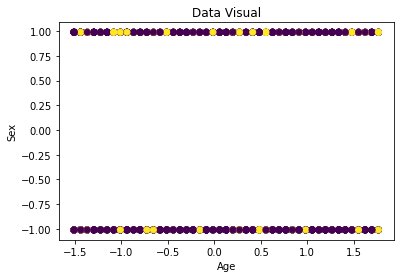

In [10]:
X1 = df.iloc[:, [1,2]]
Y = df.iloc[:, 5]

# Feature Scaling

sc_X = StandardScaler()
X1 = sc_X.fit_transform(X1)

#Memilih fitur
plt.scatter(X1[:, 0], X1[:, 1],c=Y)  
plt.xlabel('Age')
plt.ylabel('Sex')
plt.title('Data Visual')
plt.show()

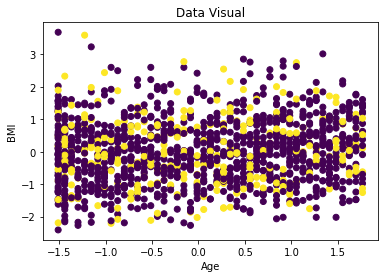

In [11]:
X2 = df.iloc[:, [1,3]]
Y = df.iloc[:, 5]

# Feature Scaling
sc_X = StandardScaler()
X2 = sc_X.fit_transform(X2)

plt.scatter(X2[:, 0], X2[:, 1],c=Y)  
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Data Visual')
plt.show()

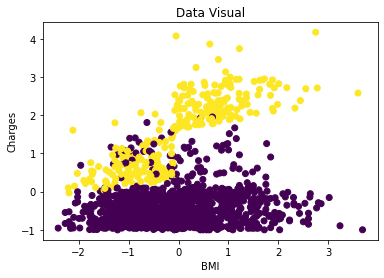

In [12]:
X3 = df.iloc[:, [3,7]]
Y = df.iloc[:, 5]

# Feature Scaling
sc_X = StandardScaler()
X3 = sc_X.fit_transform(X3)

plt.scatter(X3[:, 0], X3[:, 1],c=Y)  
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Data Visual')
plt.show()

#MEMBUAT MODEL SVM

###SPLIT DATA

In [13]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X3, Y, test_size = 0.25, random_state = 0)

In [14]:
print("Training data : ",X_Train.shape)
print("Testing data  : ",X_Test.shape)

Training data :  (1003, 2)
Testing data  :  (335, 2)


###TRAIN DATA

In [15]:
#EVALUASI MODEL ML

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)
# Predicting the test set results
Y_Pred = classifier.predict(X_Test)
from sklearn import metrics
print('Accuracy Score: with linear kernel')
print(metrics.accuracy_score(Y_Test,Y_Pred))

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_Train, Y_Train)
# Predicting the test set results
Y_Pred = classifier.predict(X_Test)
print('Accuracy Score: with default rbf kernel')
print(metrics.accuracy_score(Y_Test,Y_Pred))

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma = 15, C=7,  random_state=0) 
classifier.fit(X_Train, Y_Train)
# Predicting the test set results
Y_Pred = classifier.predict(X_Test)
print('Accuracy Score On Test Data: with default rbf kernel')
print(metrics.accuracy_score(Y_Test,Y_Pred))

svc=SVC(kernel='poly', degree = 4)
svc.fit(X_Train,Y_Train)
y_pred=svc.predict(X_Test)
print('Accuracy Score:with poly kernel and degree ')
print(metrics.accuracy_score(Y_Test,Y_Pred)) 

Accuracy Score: with linear kernel
0.9462686567164179
Accuracy Score: with default rbf kernel
0.9582089552238806
Accuracy Score On Test Data: with default rbf kernel
0.9552238805970149
Accuracy Score:with poly kernel and degree 
0.9552238805970149


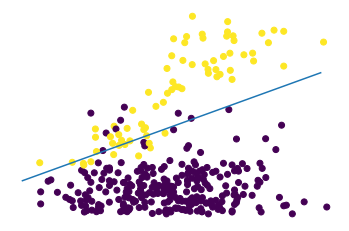

In [16]:
#from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

# Plot data points
plt.scatter(X_Test[:, 0], X_Test[:, 1],c=Y_Test)  

# Create the hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0]) / w[1]  

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

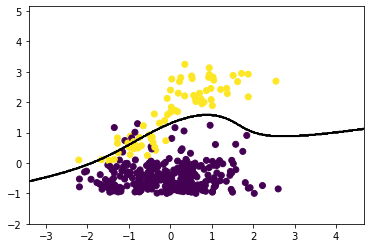

In [18]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Create a linear SVM model with polynomial kernel
svc = SVC(kernel='poly', degree=3, C=1)

# Fit the model to the data
svc.fit(X_Train, Y_Train)

# Create a mesh grid to plot in
x_min, x_max = X_Train[:, 0].min() - 1, X_Train[:, 0].max() + 1
y_min, y_max = X_Train[:, 1].min() - 1, X_Train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Use the predict method to get the predictions for the mesh grid
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data and the predictions
plt.contour(xx, yy, Z, colors='k')
#plt.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train, cmap=plt.cm.coolwarm)
plt.scatter(X_Test[:, 0], X_Test[:, 1],c=Y_Test)  
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

#MENGGUNAKAN CODE UNTUK KLASIFIKASI DATA BARU

BMI : 20
Charges  : 20000
New data :  (1, 2)
Smoker : [1]
Person with 20.0 BMI, and 20000.0 Charges could be classified as 
Smoker


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BMI
- Charges
Feature names seen at fit time, yet now missing:
- bmi
- charges

  warnings.warn(message, FutureWarning)


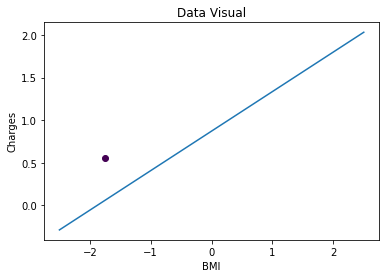

In [ ]:
#Take model to classify new data

bmi = float(input("BMI : "))
charges = float(input("Charges  : "))

# Create a data frame with three columns and three rows
ND = pd.DataFrame({'BMI' : [bmi], 'Charges' : [charges]})

NewData = ND.iloc[:, [0,1]]
print("New data : ",NewData.shape)

# Feature Scaling
NewData = sc_X.transform(NewData)

# Predicting the New Data results
NewData_Pred = classifier.predict(NewData)
print("Smoker : " + str(NewData_Pred))

print("Person with " + str(bmi)+ " BMI, and " + str(charges) + " Charges could be classified as ")
if NewData_Pred == 0:
  print("not Smoker")
else:
  print("Smoker")

# Update a data frame with three columns and three rows
ND = pd.DataFrame({'BMI' : [bmi], 'Charges' : [charges], 'Result' : [NewData_Pred]})

# Print the data frame
ND.head()

# Plot data points
plt.scatter(NewData[:, 0], NewData[:, 1],c=NewData_Pred)


# Create the hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0]) / w[1]  

# Plot the hyperplane
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Data Visual')
plt.plot(xx, yy)
plt.show() 